In [1]:
import pandas as pd

import networkx as nx

import numpy as np

import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('datasets/dataset.csv')

In [7]:
df=df.sort_values(by=['user_id','date_created'])

In [9]:
df["source"] = df["book"]

In [12]:
df["source"] = df["chapter"] + df["book"]

In [14]:
df["target"]= df["source"].shift(-1)  

In [16]:
df["user_check"]= df["user_id"].shift(-1)

In [18]:
df['keep_drop'] = np.where((df['user_check'] == df['user_id'])
                     , df['user_id'], np.nan)

In [20]:
df=df.dropna(subset=["keep_drop"])

In [90]:
G=nx.from_pandas_edgelist(df, "source", "target", create_using=nx.DiGraph)

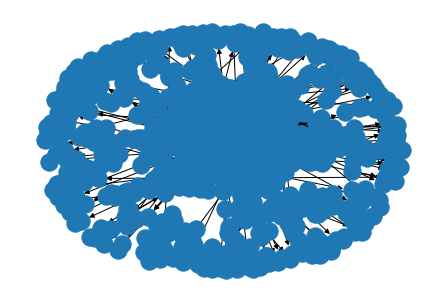

In [91]:
nx.draw(G)

In [28]:
df.to_csv('network.csv')

In [67]:
df["date_created"] = pd.to_datetime(df["date_created"], format=' "%Y-%m-%d %H:%M:%S"')

/Users/euniceadrien/training_graph/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
df["user_check"] = df["user_check"].astype("int64")

/Users/euniceadrien/training_graph/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
df["keep_drop"] = df["keep_drop"].astype("int64")

/Users/euniceadrien/training_graph/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
df

,user_id,number_of_ticks,date_created,chapter,book,numberofentriesofbook,numberofusersofbook,product_manning_id,user_owns_book,source,target,user_check,keep_drop
1,-2146355313,8,2019-12-14 10:05:50,chapter-8,fain3,737,225,1069,1,chapter-8fain3,chapter-1ramamurthy,-2146355313,-2146355313
2,-2146355313,8,2019-12-14 10:05:50,chapter-1,ramamurthy,715,202,1120,1,chapter-1ramamurthy,chapter-1thomas,-2146355313,-2146355313
29,-2145886989,10,2019-12-10 13:07:05,chapter-4,mcnamara,2533,461,880,1,chapter-4mcnamara,chapter-4mcnamara,-2145886989,-2145886989
32,-2145886989,10,2019-12-10 13:41:25,chapter-4,mcnamara,2533,461,880,1,chapter-4mcnamara,chapter-1mcnamara,-2145886989,-2145886989
7,-2145886989,1,2019-12-10 19:37:20,chapter-1,mcnamara,2533,461,880,1,chapter-1mcnamara,chapter-1mcnamara,-2145886989,-2145886989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,-2019295583,6,2019-12-07 16:00:11,chapter-1,roestenburg,344,65,486,0,chapter-1roestenburg,chapter-1roestenburg,-2019295583,-2019295583
4990,-2019295583,10,2019-12-07 16:09:21,chapter-1,roestenburg,344,65,486,0,chapter-1roestenburg,chapter-1roestenburg,-2019295583,-2019295583
4991,-2019295583,102,2019-12-07 16:14:21,chapter-1,roestenburg,344,65,486,0,chapter-1roestenburg,chapter-1roestenburg,-2019295583,-2019295583
4992,-2019295583,107,2019-12-07 17:51:22,chapter-1,roestenburg,344,65,486,0,chapter-1roestenburg,chapter-1roestenburg,-2019295583,-2019295583


In [81]:
df = df.reset_index()

In [86]:
df = df.drop(["index"],axis=1)

In [89]:
df.to_csv('network.csv',index=False)